<a href="https://colab.research.google.com/github/AsncnJenny5/TelecomX1_analisis/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [113]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [115]:
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [116]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### **Analisis de la estructura de los datos**


1. Identificación de cliente: 'customerID'
    * 'churn' : indica si el cliente cancelo el servicio
2. Información del cliente: 'customer'
    * 'gender' : Género del cliente
    * 'SeniorCitizen' : Indica si el cliente es una persona mayor
    * 'Partner' : Si el cliente tiene pareja
    * 'Dependents' : Si el cliente tiene dependientes
    * 'tenure' : Tiempo de permanencia como cliente (en meses)
3. Servicios de Telefonía: 'phone'
    * 'PhoneService' : Indica si el cliente posee servicio de teléfono
    * 'MultipleLines' : Si posee multiples líneas teléfonicas.
4. Servicios de Internet: 'internet'
    * Tipo de servicio de internet contratado (DSL, Fiber optic, No)
    * Servicios adicionales (On LineSecurity,OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
5. Información de la cuenta: 'account'
    * 'Contract' : Tipo de contrato (Month-to-month, One year, Two year)
    * 'PaperlessBilling : Si el cliente recibe facturas electrónicas
    * 'PaymentMethod' : Método de pago (Bank transfer, Credit card, Electronic check, Mailed check).
    * 'Charges'
    * 'Monthly': Valor mensual cobrado
    * 'Total' : Valor total pagado por el cliente



#🔧 Transformación

#### Ahora iniciaremos con la transformación y limpieza de los datos

In [117]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### **1. Verificación de valores únicos**

In [119]:
for col in df.columns:
    print((f'{col}: {df[col].nunique()}'))
    unicos = df[col].unique()
    if df[col].nunique() < 50:
      print(df[col].unique())
    print('-' * 50)

customerID: 7267
--------------------------------------------------
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
--------------------------------------------------
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet.OnlineBackup: 3
['Yes' 

### **2. Verificando valores duplicados**

In [120]:
print('Números duplicados:', df.duplicated().sum())

Números duplicados: 0


### **3. Identificando valores nulos**

In [121]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### **4. Valores vacios o en blanco**

In [122]:
df.apply(lambda x: x.astype(str).str.strip()== '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [123]:
df.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


#### Hallazgos detectados:
* Churn tiene 224 filas con string vacio '': tratar como nulos y eliminar
* Charges.Total es string en lugar de floar: se convertira
* Charges.Total tiene 11 valoes no convertibles tras la conversión: se deberan eliminar
* SeniorCitizen esta en 0/1: mapear Si/No junto con la traducción al español

### **TRANSFORMACIÓN**

In [124]:
# Reemplazar string vacios por NaN
df.replace('', np.nan, inplace=True)

In [125]:
# Convertir Charges.Total a float
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [126]:
# Eliminar filas con nulos
nulos_antes = df.shape[0]
df.dropna(inplace=True)
nulos_despues = df.shape[0]
print(f'Filas eliminadas: {nulos_antes-nulos_despues}')
print(f'Filas restantes: {nulos_despues}')

Filas eliminadas: 235
Filas restantes: 7032


In [127]:
# Eliminar duplicados
duplicados = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f'Duplicados elimnados: {duplicados}')

Duplicados elimnados: 0


In [128]:
#Verificación de vacios o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [129]:
# verificando numeros nulos
print('Numero de Nulos \n', df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [130]:
# Renombrar nombres
df.rename(columns={
    'customerID'                : 'Id_cliente',
    'Churn'                     : 'evasion',
    'customer.gender'           : 'genero',
    'customer.SeniorCitizen'    : 'adulto_mayor',
    'customer.Partner'          : 'tiene_pareja',
    'customer.Dependents'       : 'tiene_dependientes',
    'customer.tenure'           : 'meses_contrato',
    'phone.PhoneService'        : 'servicio_telefonico',
    'phone.MultipleLines'       : 'lineas_multiples',
    'internet.InternetService'  : 'servicio_internet',
    'internet.OnlineSecurity'   : 'seguridad_online',
    'internet.OnlineBackup'     : 'respaldo_online',
    'internet.DeviceProtection' : 'proteccion_dispositivos',
    'internet.TechSupport'      : 'soporte_tecnico',
    'internet.StreamingTV'      : 'streaming_TV',
    'internet.StreamingMovies'  : 'streaming_peliculas',
    'account.Contract'          : 'tipo_contrato',
    'account.PaperlessBilling'  : 'factura_electronica',
    'account.PaymentMethod'     : 'metodo_pago',
    'account.Charges.Monthly'   : 'cargo_mensual',
    'account.Charges.Total'     : 'cargo_total',
}, inplace=True)

In [131]:
df

,Id_cliente,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [132]:
df['evasion'] = df['evasion'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['tiene_pareja'] = df['tiene_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['tiene_dependientes'] = df['tiene_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefonico'] = df['servicio_telefonico'].replace({'Yes': 'Sí', 'No': 'No'})
df['lineas_multiples'] = df['lineas_multiples'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['servicio_internet'] = df['servicio_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df['metodo_pago'] = df['metodo_pago'].replace({
                                    'Mailed check': 'Cheque enviado por correo',
                                    'Electronic check': 'Cheque electrónico',
                                    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
                                    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
                                    })

df.head()

,Id_cliente,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Yes,No,Yes,Yes,No,Anual,Yes,Cheque enviado por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Yes,Mensual,No,Cheque enviado por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Yes,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Yes,Yes,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40


In [133]:
columnas_a_traducir = ['seguridad_online', 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico', 'streaming_TV', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id_cliente               7032 non-null   object 
 1   evasion                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   adulto_mayor             7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependientes       7032 non-null   object 
 6   meses_contrato           7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_online         7032 non-null   object 
 11  respaldo_online          7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  streaming_TV             7032

#📊 Carga y análisis

In [135]:
df.describe()

,adulto_mayor,meses_contrato,cargo_mensual,cargo_total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [136]:
# Cargo diario estimado
df['cargo_diario'] = (df['cargo_mensual']/30).round(2)

In [137]:
# Segmento de antiguedad
df['segmento_antiguedad'] = pd.cut(df['meses_contrato'], bins=[0, 12, 36, 72], labels=['Nuevo (0-12m)', 'Intermedio (13-36m)', 'Fiel (37-72,)'])
print('Variables derivadas creadas')
print(df[['meses_contrato', 'segmento_antiguedad', 'cargo_mensual', 'cargo_diario']].head(5))

Variables derivadas creadas
   meses_contrato  segmento_antiguedad  cargo_mensual  cargo_diario
0               9        Nuevo (0-12m)           65.6          2.19
1               9        Nuevo (0-12m)           59.9          2.00
2               4        Nuevo (0-12m)           73.9          2.46
3              13  Intermedio (13-36m)           98.0          3.27
4               3        Nuevo (0-12m)           83.9          2.80


In [138]:
print('Dimensiones finales:', df.shape)
print()
print('Distribución de Evasión:')
print(df['evasion'].value_counts())
print(f"\nTasa de evasión: {(df['evasion'] == 'Sí').mean():.1%}")
df.head()

Dimensiones finales: (7032, 23)

Distribución de Evasión:
evasion
No    5163
Sí    1869
Name: count, dtype: int64

Tasa de evasión: 26.6%


,Id_cliente,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario,segmento_antiguedad
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.19,Nuevo (0-12m)
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,2.00,Nuevo (0-12m)
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.46,Nuevo (0-12m)
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.27,Intermedio (13-36m)
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.80,Nuevo (0-12m)


In [139]:
# Visuallización para análsis de Evasión

In [140]:
# Distribución general de Evasion.

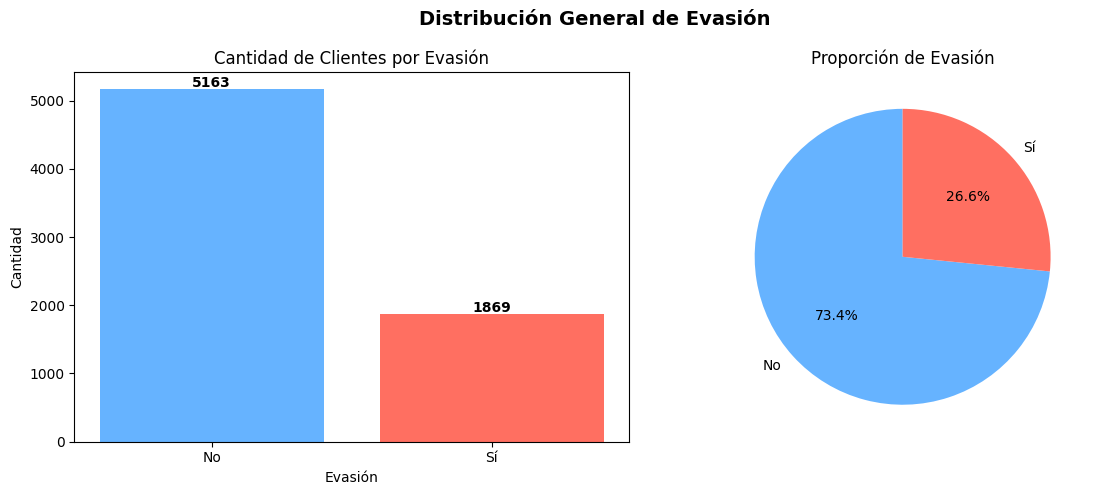

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conteo
conteo = df['evasion'].value_counts()
axes[0].bar(conteo.index, conteo.values, color=['#66b3ff','#ff6f61'])
axes[0].set_title('Cantidad de Clientes por Evasión')
axes[0].set_xlabel('Evasión')
axes[0].set_ylabel('Cantidad')
for i, v in enumerate(conteo.values):
    axes[0].text(i, v + 30, str(v), ha='center', fontweight='bold')

# Proporción
axes[1].pie(conteo.values, labels=conteo.index, autopct='%1.1f%%',
            colors=['#66b3ff','#ff6f61'], startangle=90)
axes[1].set_title('Proporción de Evasión')

plt.suptitle('Distribución General de Evasión', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('evasion_general.png', dpi=150, bbox_inches='tight')
plt.show()

In [142]:
# Evasion por tipo de contrato

In [143]:
print(df['evasion'].unique())
print(df['evasion'].dtype)

['No' 'Sí']
object


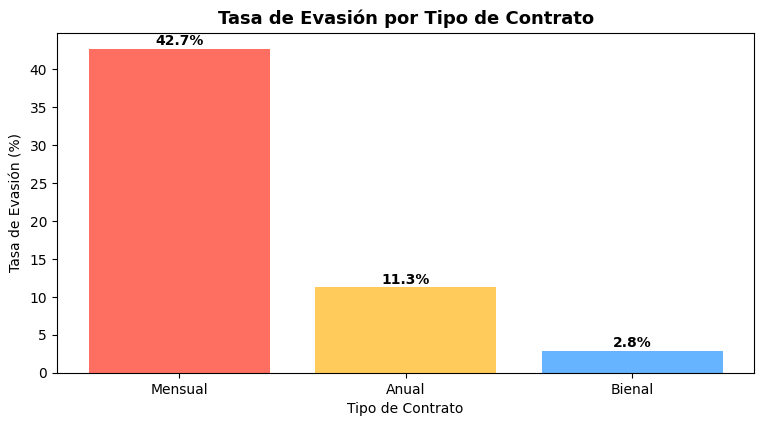

In [161]:
tasa = df.groupby('tipo_contrato', observed=True)['evasion'].apply(lambda x: (x == 'Sí').mean() * 100).reset_index()
tasa.columns = ['tipo_contrato', 'tasa_evasion']
tasa = tasa.sort_values('tasa_evasion', ascending=False)

plt.figure(figsize=(9, 5))
bars = plt.bar(tasa['tipo_contrato'], tasa['tasa_evasion'], color=['#ff6f61','#ffcc5c','#66b3ff'])
plt.title('Tasa de Evasión por Tipo de Contrato', fontsize=13, fontweight='bold')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Evasión (%)')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{bar.get_height():.1f}%", ha='center', fontweight='bold')
plt.subplots_adjust(bottom=0.2)
plt.savefig('evasion_por_contrato.png', dpi=150, bbox_inches='tight')
plt.show()

In [145]:
# Evasion por servicio de internet

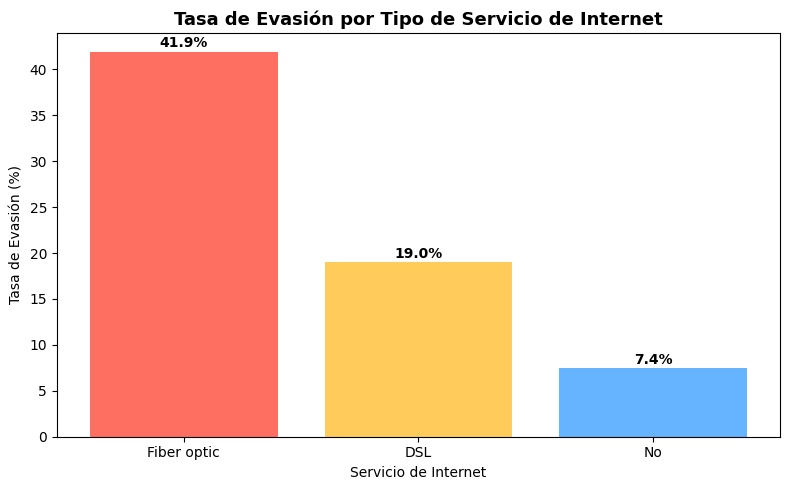

In [162]:
tasa_internet = df.groupby('servicio_internet', observed=True)['evasion'].apply(lambda x: (x == 'Sí').mean() * 100).reset_index()
tasa_internet.columns = ['servicio_internet', 'tasa_evasion']
tasa_internet = tasa_internet.sort_values('tasa_evasion', ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(tasa_internet['servicio_internet'], tasa_internet['tasa_evasion'],
               color=['#ff6f61','#ffcc5c','#66b3ff'])
plt.title('Tasa de Evasión por Tipo de Servicio de Internet', fontsize=13, fontweight='bold')
plt.xlabel('Servicio de Internet')
plt.ylabel('Tasa de Evasión (%)')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{bar.get_height():.1f}%", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('evasion_por_servicio_internet.png', dpi=150, bbox_inches='tight')
plt.show()

In [147]:
# Distribución de meses de contrato según Evasión

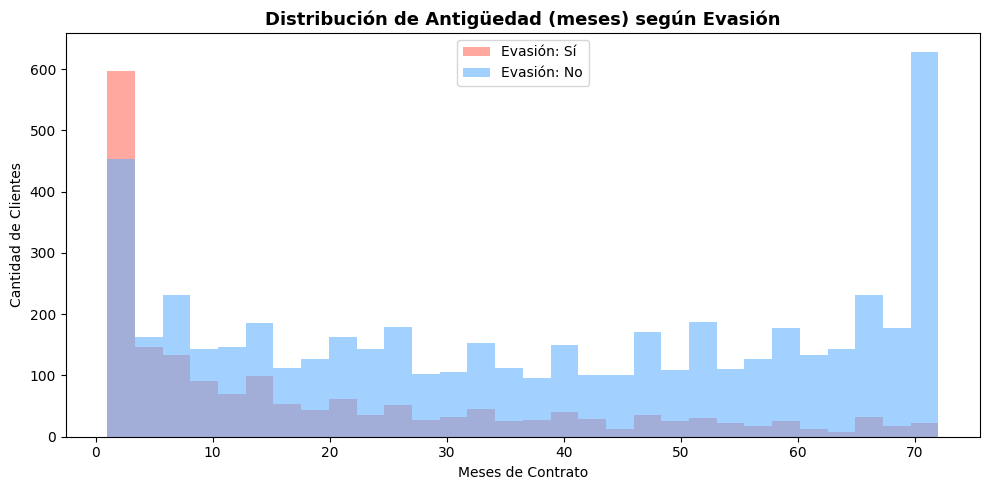

In [163]:
plt.figure(figsize=(10, 5))
for label, color in [('Sí', '#ff6f61'), ('No', '#66b3ff')]:
    subset = df[df['evasion'] == label]['meses_contrato']
    plt.hist(subset, bins=30, alpha=0.6, label=f'Evasión: {label}', color=color)
plt.title('Distribución de Antigüedad (meses) según Evasión', fontsize=13, fontweight='bold')
plt.xlabel('Meses de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend()
plt.tight_layout()
plt.savefig('evasion_por_meses_contrato.png', dpi=150, bbox_inches='tight')
plt.show()

In [151]:
# Evasion por Segmento de antiguedad

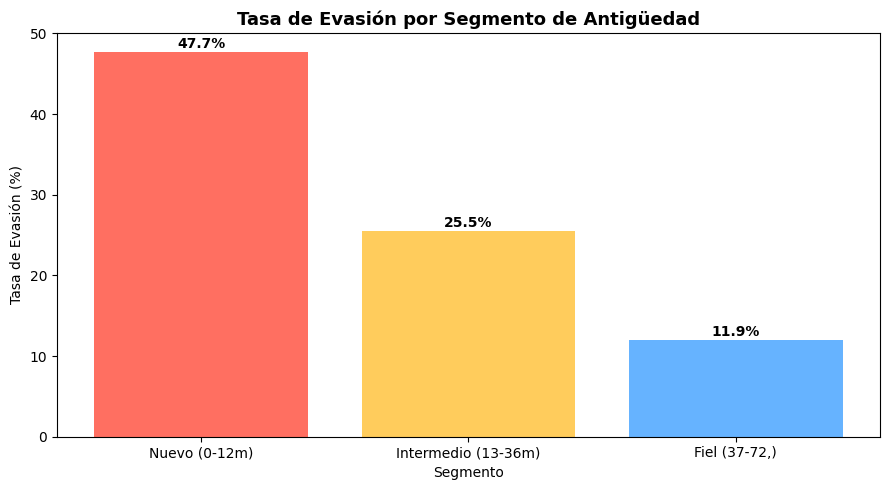

In [164]:
tasa_seg = df.groupby('segmento_antiguedad', observed=True)['evasion'].apply(
    lambda x: (x == 'Sí').mean() * 100
).reset_index()
tasa_seg.columns = ['segmento', 'tasa_evasion']

plt.figure(figsize=(9, 5))
bars = plt.bar(tasa_seg['segmento'], tasa_seg['tasa_evasion'],
               color=['#ff6f61','#ffcc5c','#66b3ff'])
plt.title('Tasa de Evasión por Segmento de Antigüedad', fontsize=13, fontweight='bold')
plt.xlabel('Segmento')
plt.ylabel('Tasa de Evasión (%)')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{bar.get_height():.1f}%", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('evasion_por_antiguedad', dpi=150, bbox_inches='tight')
plt.show()

In [153]:
# Evasion por método de pago

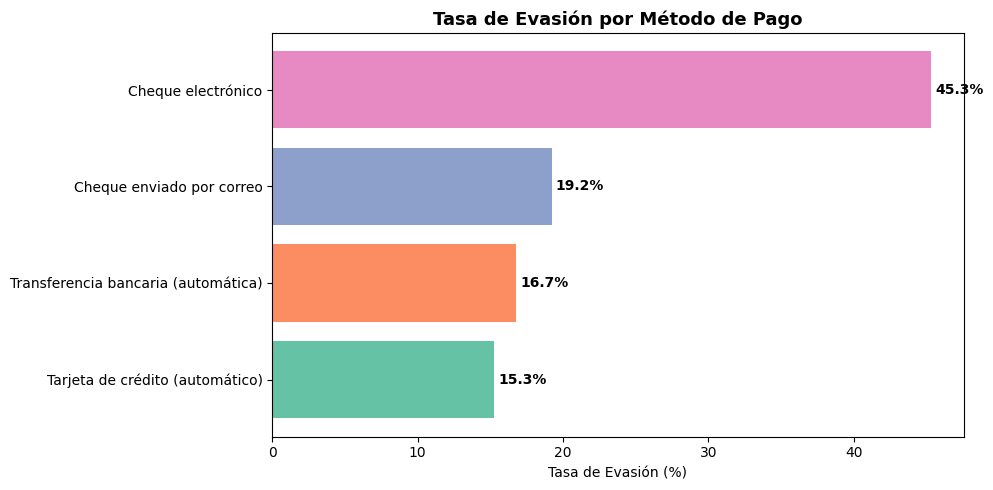

In [165]:
tasa_pago = df.groupby('metodo_pago', observed=True)['evasion'].apply(lambda x: (x == 'Sí').mean() * 100).reset_index()
tasa_pago.columns = ['metodo_pago', 'tasa_evasion']
tasa_pago = tasa_pago.sort_values('tasa_evasion', ascending=True)

plt.figure(figsize=(10, 5))
bars = plt.barh(tasa_pago['metodo_pago'], tasa_pago['tasa_evasion'],
                color=sns.color_palette('Set2', len(tasa_pago)))
plt.title('Tasa de Evasión por Método de Pago', fontsize=13, fontweight='bold')
plt.xlabel('Tasa de Evasión (%)')
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('evasion_por_metodo_pago', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Evasion por rango etario

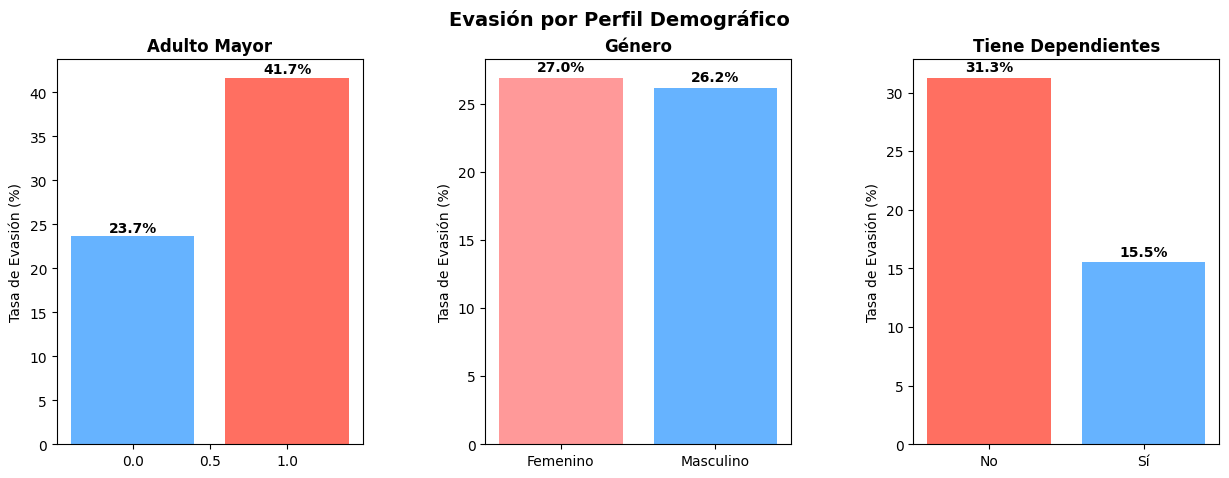

In [171]:
# Evasión por Perfil Demográfico
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# --- Adulto Mayor ---
tasa_am = df.groupby('adulto_mayor', observed=True)['evasion'].apply(
    lambda x: (x == 'Sí').mean() * 100
).reset_index()
tasa_am.columns = ['adulto_mayor', 'tasa']

axes[0].bar(tasa_am['adulto_mayor'], tasa_am['tasa'], color=['#66b3ff','#ff6f61'])
axes[0].set_title('Adulto Mayor', fontweight='bold')
axes[0].set_ylabel('Tasa de Evasión (%)')
for i, row in tasa_am.iterrows():
    axes[0].text(i, row['tasa'] + 0.5, f"{row['tasa']:.1f}%", ha='center', fontweight='bold')

# --- Género ---
tasa_gen = df.groupby('genero', observed=True)['evasion'].apply(
    lambda x: (x == 'Sí').mean() * 100
).reset_index()
tasa_gen.columns = ['genero', 'tasa']

axes[1].bar(tasa_gen['genero'], tasa_gen['tasa'], color=['#ff9999','#66b3ff'])
axes[1].set_title('Género', fontweight='bold')
axes[1].set_ylabel('Tasa de Evasión (%)')
for i, row in tasa_gen.iterrows():
    axes[1].text(i, row['tasa'] + 0.5, f"{row['tasa']:.1f}%", ha='center', fontweight='bold')

# --- Pareja y Dependientes ---
tasa_dep = df.groupby('tiene_dependientes', observed=True)['evasion'].apply(
    lambda x: (x == 'Sí').mean() * 100
).reset_index()
tasa_dep.columns = ['tiene_dependientes', 'tasa']

axes[2].bar(tasa_dep['tiene_dependientes'], tasa_dep['tasa'], color=['#ff6f61','#66b3ff'])
axes[2].set_title('Tiene Dependientes', fontweight='bold')
axes[2].set_ylabel('Tasa de Evasión (%)')
for i, row in tasa_dep.iterrows():
    axes[2].text(i, row['tasa'] + 0.5, f"{row['tasa']:.1f}%", ha='center', fontweight='bold')

plt.suptitle('Evasión por Perfil Demográfico', fontsize=14, fontweight='bold')
plt.subplots_adjust(wspace=0.4)
plt.savefig('evasion_perfil_demografico.png', dpi=150, bbox_inches='tight')
plt.show()

In [174]:
# Promedio de evadidos por cargo mensual

Promedio evadidos:  $74.44
Promedio retenidos: $61.31
Diferencia:         $13.13


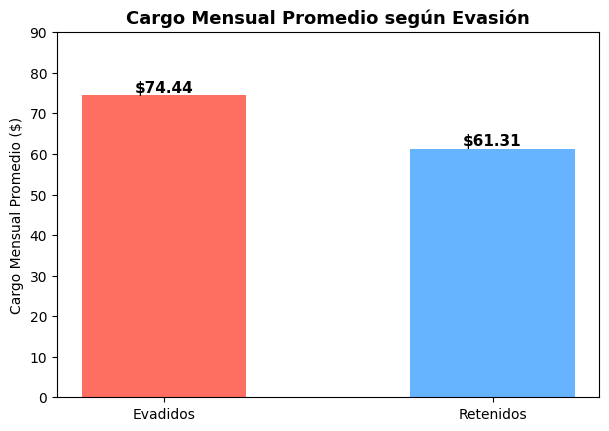

In [175]:
# Cálculo
promedio_evadidos   = df[df['evasion']=='Sí']['cargo_mensual'].mean().round(2)
promedio_retenidos  = df[df['evasion']=='No']['cargo_mensual'].mean().round(2)
diferencia          = (promedio_evadidos - promedio_retenidos).round(2)

print(f'Promedio evadidos:  ${promedio_evadidos}')
print(f'Promedio retenidos: ${promedio_retenidos}')
print(f'Diferencia:         ${diferencia}')

# Gráfico
plt.figure(figsize=(7, 5))
bars = plt.bar(['Evadidos', 'Retenidos'], [promedio_evadidos, promedio_retenidos],
               color=['#ff6f61', '#66b3ff'], width=0.5)
plt.title('Cargo Mensual Promedio según Evasión', fontsize=13, fontweight='bold')
plt.ylabel('Cargo Mensual Promedio ($)')
plt.ylim(0, 90)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8,
             f'${bar.get_height():.2f}', ha='center', fontweight='bold', fontsize=11)
plt.subplots_adjust(bottom=0.15)
plt.savefig('evasion_cargo_mensual.png', dpi=150, bbox_inches='tight')
plt.show()

In [155]:
# Mapa de calor - correlacion de varialbles numéricas

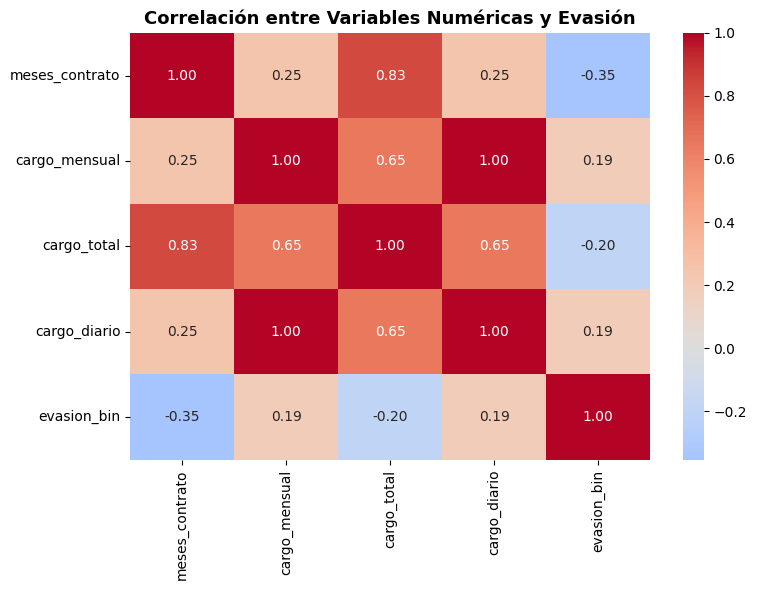

In [156]:
df_num = df[['meses_contrato', 'cargo_mensual', 'cargo_total', 'cargo_diario']].copy()
df_num['evasion_bin'] = (df['evasion'] == 'Sí').astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlación entre Variables Numéricas y Evasión', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [157]:
# Evasion por variables de Servicios Adicionales

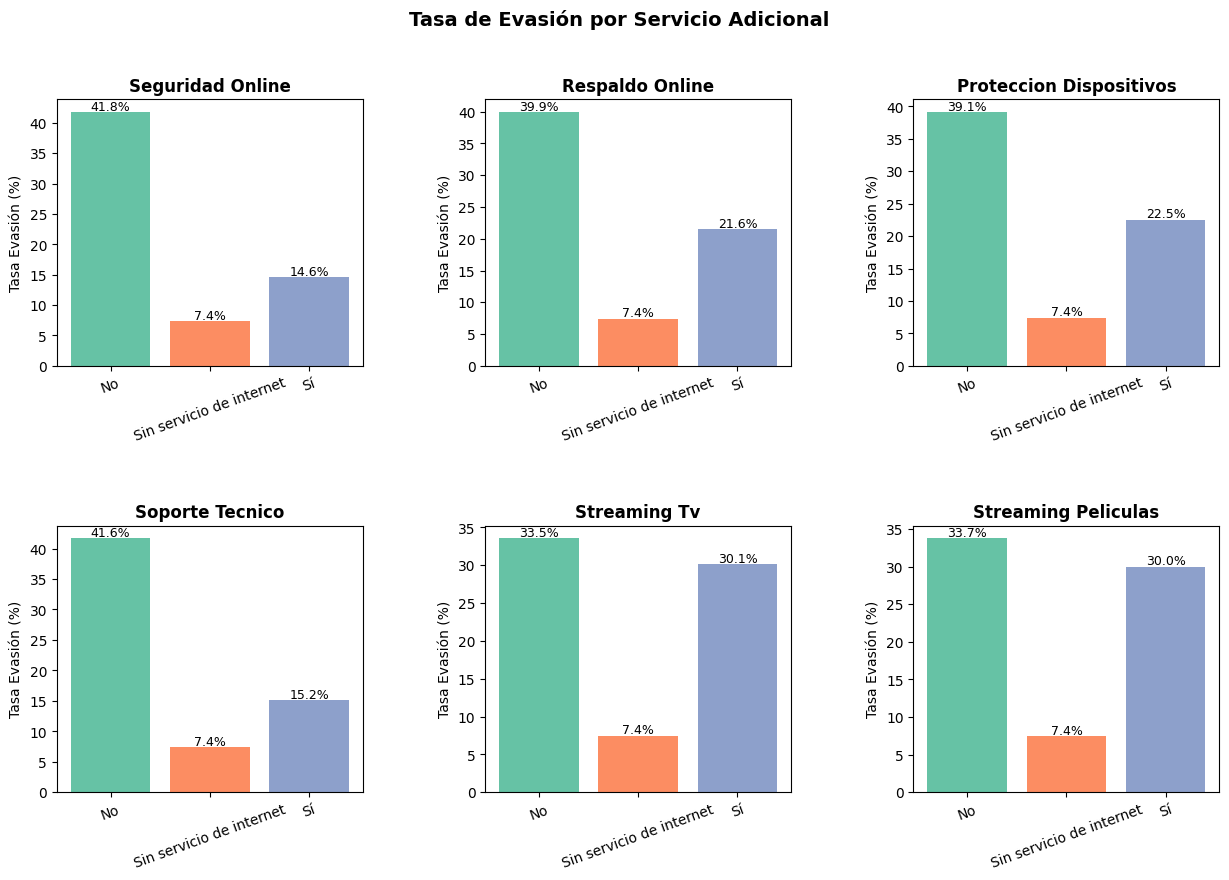

In [158]:
servicios = ['seguridad_online', 'respaldo_online', 'proteccion_dispositivos',
             'soporte_tecnico', 'streaming_TV', 'streaming_peliculas']

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, servicio in enumerate(servicios):
    tasa = df.groupby(servicio, observed=True)['evasion'].apply(lambda x: (x == 'Sí').mean() * 100).reset_index()
    tasa.columns = [servicio, 'tasa']
    axes[i].bar(tasa[servicio], tasa['tasa'],
                color=sns.color_palette('Set2', len(tasa)))
    axes[i].set_title(servicio.replace('_', ' ').title(), fontweight='bold')
    axes[i].set_ylabel('Tasa Evasión (%)')
    axes[i].tick_params(axis='x', rotation=20)
    for j, row in tasa.iterrows():
        axes[i].text(j, row['tasa'] + 0.3, f"{row['tasa']:.1f}%", ha='center', fontsize=9)

plt.suptitle('Tasa de Evasión por Servicio Adicional', fontsize=14, fontweight='bold')
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

#📄Informe final

#· **TelecomX**
##**Análisis de Evasión de clientes**

###**1. Introducción**

####     La evasión de clientes, conocida en la industria como Churn, representa uno de los mayores desafios estratégicos para las empresas de telecomunicciones. Perder un lciente no solo implica la pérdidas inmediata de ingresos, sino también el costro de adquisición de nuevos clientes para reemplazarlos, que sulee ser significativamente el mayor costo de retención.

####    TelecomX, empresa proveedores de servicos de telefonía e internet, enfrenta una tasa de evasión que requiere atención urgente. El presente informe tiene como objetivo identificar los principales factores asociados a la decision de abandono de parte de los clientes, mediante el análisis exploratorio de un conjunto de datos que contiene información demográfica, de servicios contratados y de facturación.

###**1.1 Objetivos del análsis:**

* Indentificar patrones y variables asociados a la evasion de clientes.
* Cuantificar el impacto de cada factor en la tasa de abandono.
* Proporcionar insights accionables para reducir el Churn.
* Apoyar la toma de decisiones estratégicas con base de datos.
    
###**1.2 Descripción del Dataset**

####        El conjunto de datos analizado contiene registros de 7267 clientes de TelecomX, con información estructurada en cuatro bloques temáticos:

| Bloque | Variable incluidas |
| :------ | :------------------ |
| Cliente | Género, adulto mayor, pareja, dependientes, antiguedad |
| Telefonía | Servicio telefónico, lineas multiples |
| Internet | Tipo de servicio, seguridad online, resplado, protección, soporte, streaming |
| Cuenta | Tipo de contrato, factura electrónica, método de pago, cargos mensuales y totales |



###**2. Limpieza y Tratamiento de Datos**

####Antes de proceder con el anális, fue necesario realizar una serie de transformaciones para asegurar la calidad e integridad de los datos. A continuación se describe los pasos ejecutados

####**2.1 Carga y aplanado.**

####El dataset fue entregaod en formato JSON con estructura anidada, donde los atributos de cliente, telefonía, internet y cuenta se encontran agrupados en diccionarios. Se utilizó realizar una normalizacion para aplanar cada grupo de columnas, para permitir un mayor control sobre la estrutura resultante.

####**2.2 Detección de Valores problemáticos**

####La revisión de valores únicos mediante unique() permitiio identifiar los siguientes problemas:

| Columna | Problema detectado | Registro afectado |
| :------- | :-----------------| :------------------|
| Churn(evasion) | Strings vacios en lugar de NaN | 224 filas |
| cargo_total | Tipo string en lugar de float | Columna completa |
| cargo_total | Valores no convertibles a numéricos | 11 filas |


####**2.3 Pasos de Limpiesza Ejecutados**

* Reemplazo de strings vacios por NaN con df.repalce('',np.nan)
* Conversión de Charges.Tota a tipo númerico
* Eliminación de filas con valores nuos: 235 filas removidas en total
* Verificación y eliminación de duplicados, ninguno encontrado.

####**2.4 Traducción la español**

####Se renombraron las 21 columnas al español y todos los valores categóricos con df.replace().

####**2.5 Variables Derivadas**

####Se crearon dos nuevas variables para enriquecer el análsis:
* cargo_diario: cargo mensual dividido en 30 días, para una visión de costo diario.
* segmento_antiguedad: clasificación de calientes en Nuevo (0-12m), Intermedio (13-36m) y Fiel (37-72m).

####**2.6 Resultados del proceso**

* Registros originales: 7267
* Registros eliminados: 235
* Registros finales: 7032
* Variables totales: 23

###**3. Análisis Exploratorio de Datos**

####**3.1 Distribución General de Evasión**

####     Del total de 7032 clientes analizados, 1869 abandonaron el servicio, lo que presenta una tasa de evasión de 26.6%. Esto significa que aproximadamente 1 de cada 4 clientes se dan de baja, una cifra significativa que justifica la implementación de retención.

* Total de clientes: 7032
* Clientes que evadieron: 1869
* Clientes retenidos: 5163
* Tasa de Evasión: 26.6

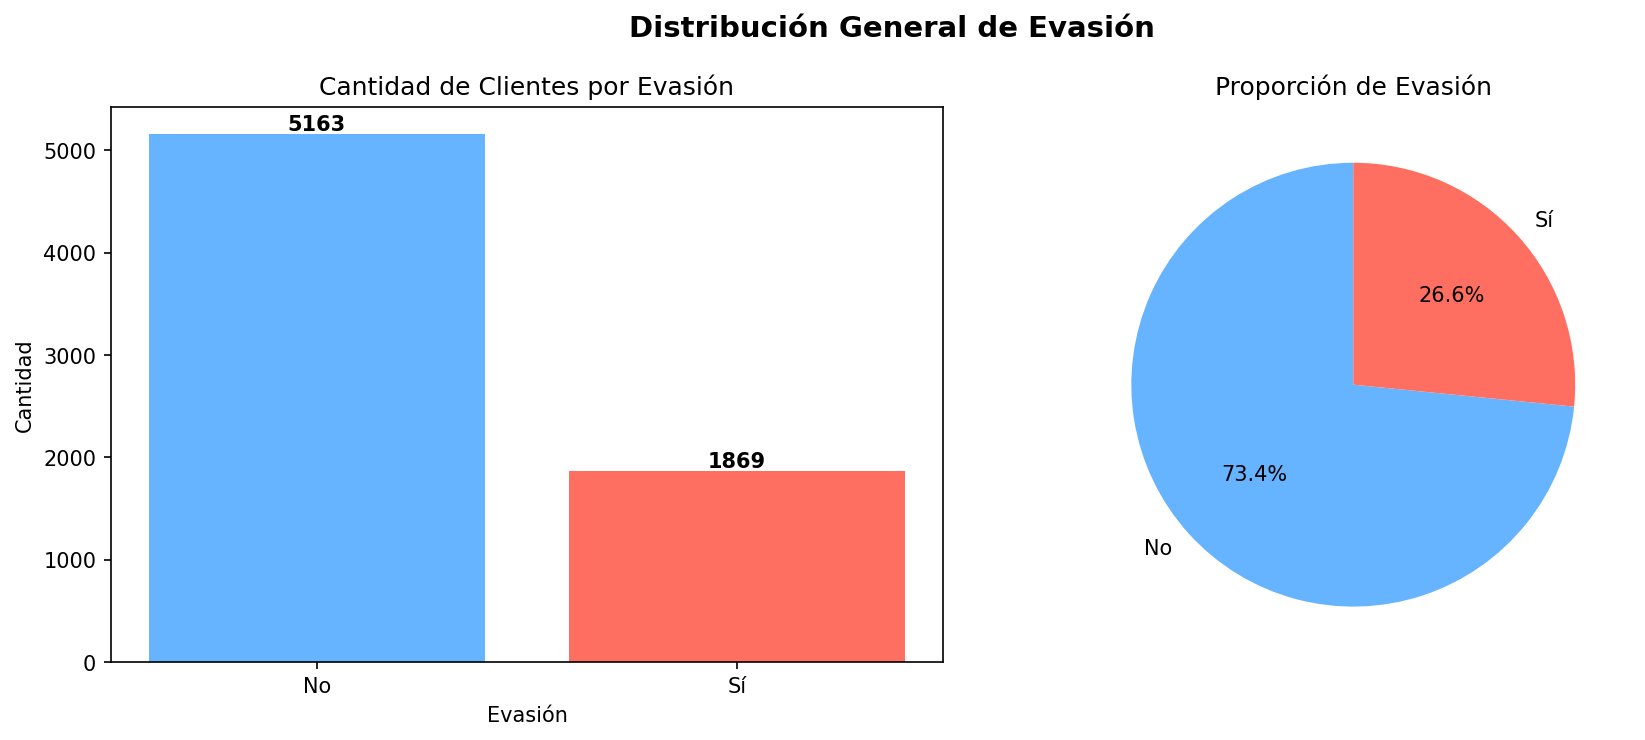

####**3.2 Evasión por tipo de contrato**
####     El tipo de contrato es el factor con mayor difetenciación en la tasa de evasión. Los clientes con contrato mes a mes presentan una tasa de 42.7%, frente al 11.3% de contratos anuales y apenas el 2.8% de contratos bianuales. Esto sugiere que la fidelización contractual tiene un efecto protector muy fuerte.

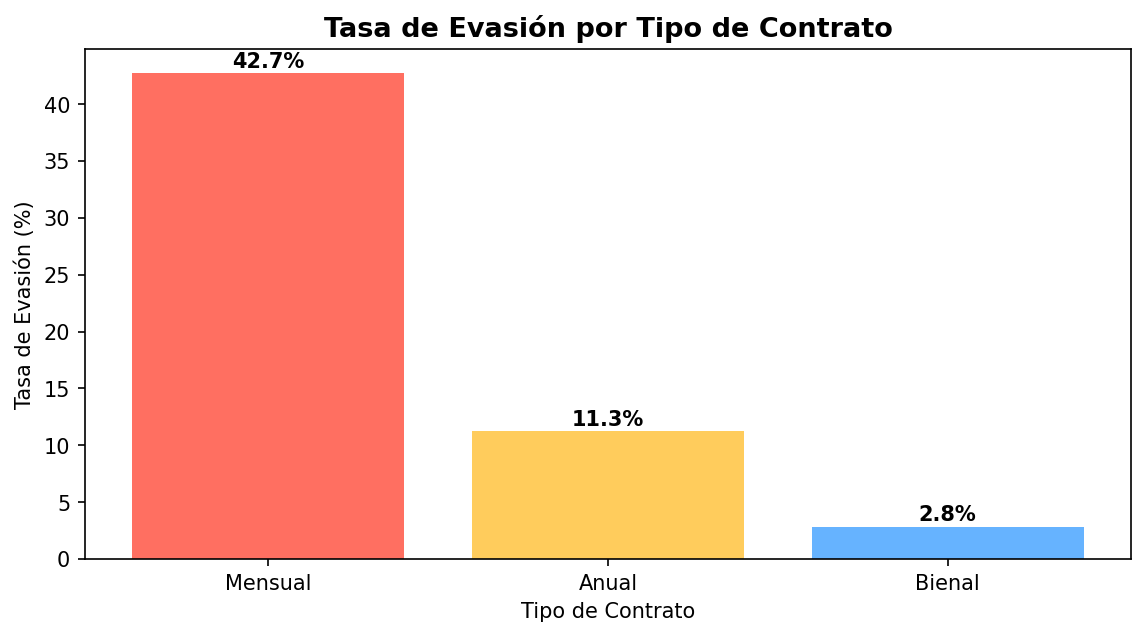

####**3.3 Evasión por tipo de Servicio de Internet**

####     Los clientes con fibra optica presentan la tasa de evasión más alta (41.9%), superando ampliamente a los clientes de DSL (19.0%) y a quientes no tienen servicio de Internet (7.4%). DAdo que la fibra óptica es el servicio premium y de mayor costo, este patrón podría estar relacionado con expectativas no satisfechas respecto a la calidad o el precio.

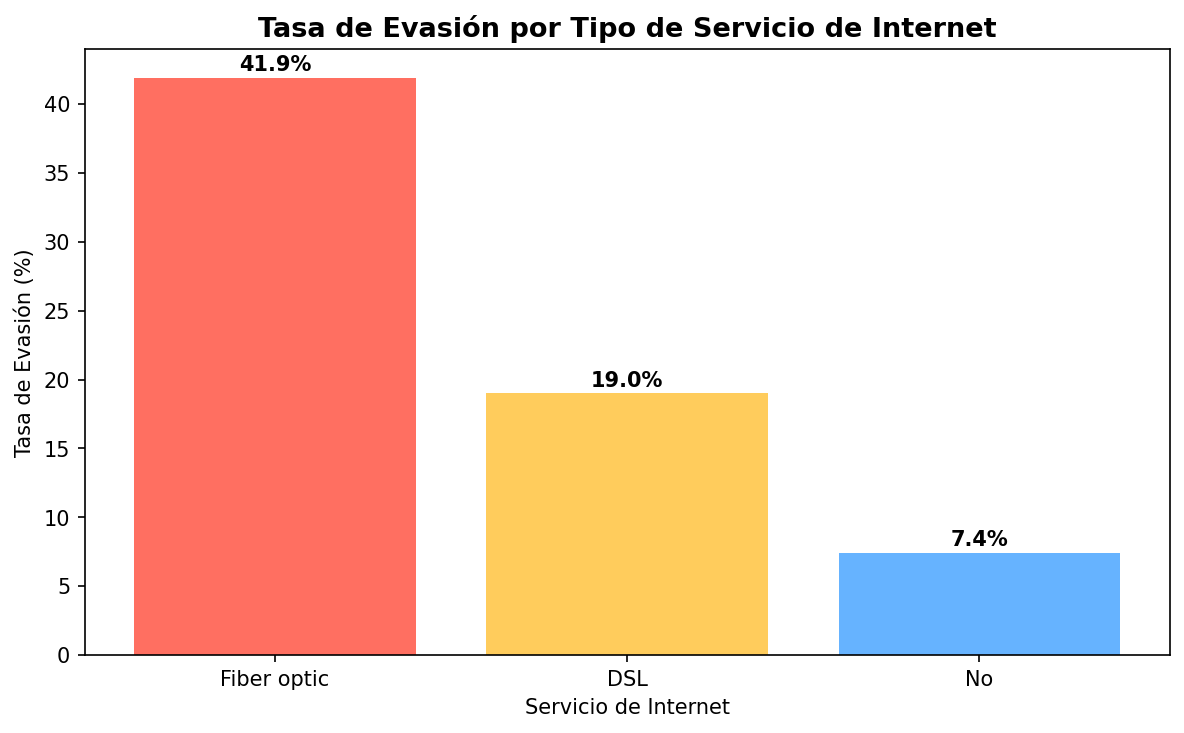

####**3.4 Evasión por Método de pago**

#### El cheque electrónico concentra la mayor tasa de evasión con un 45.3% muy por encima de los métodos automáticos como transferencia bancaria (16.7%) y tarjeta de credito (15.3%). Los pagos automáticos generan mayor inercia de permanencia, ya que el cliente debe tomar una acción activa para cancelar.



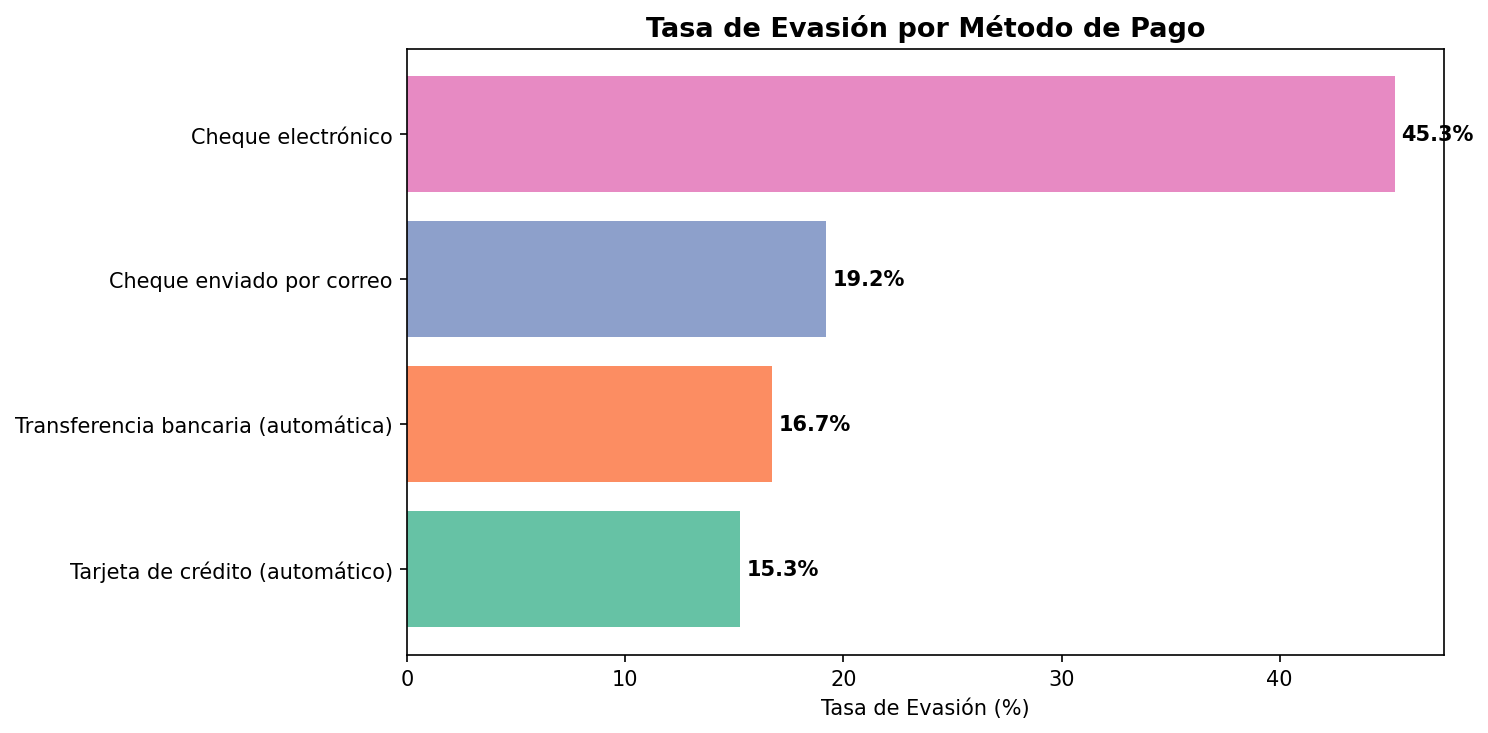

####**3.5 Evasión por antiguedad del Cliente**

#### Existe una relacion inversa clara entre la antiguedad y la evasión. Los clientes que abandonan tienen en promedio 18 meses de contrato, mientras que los que permanecen tiene 37.7 mese en promedio. Los clientes nuevos (0-12 meses) son el segmento más vulnerable, donde ocurre la mayor concentración de abandonos



---

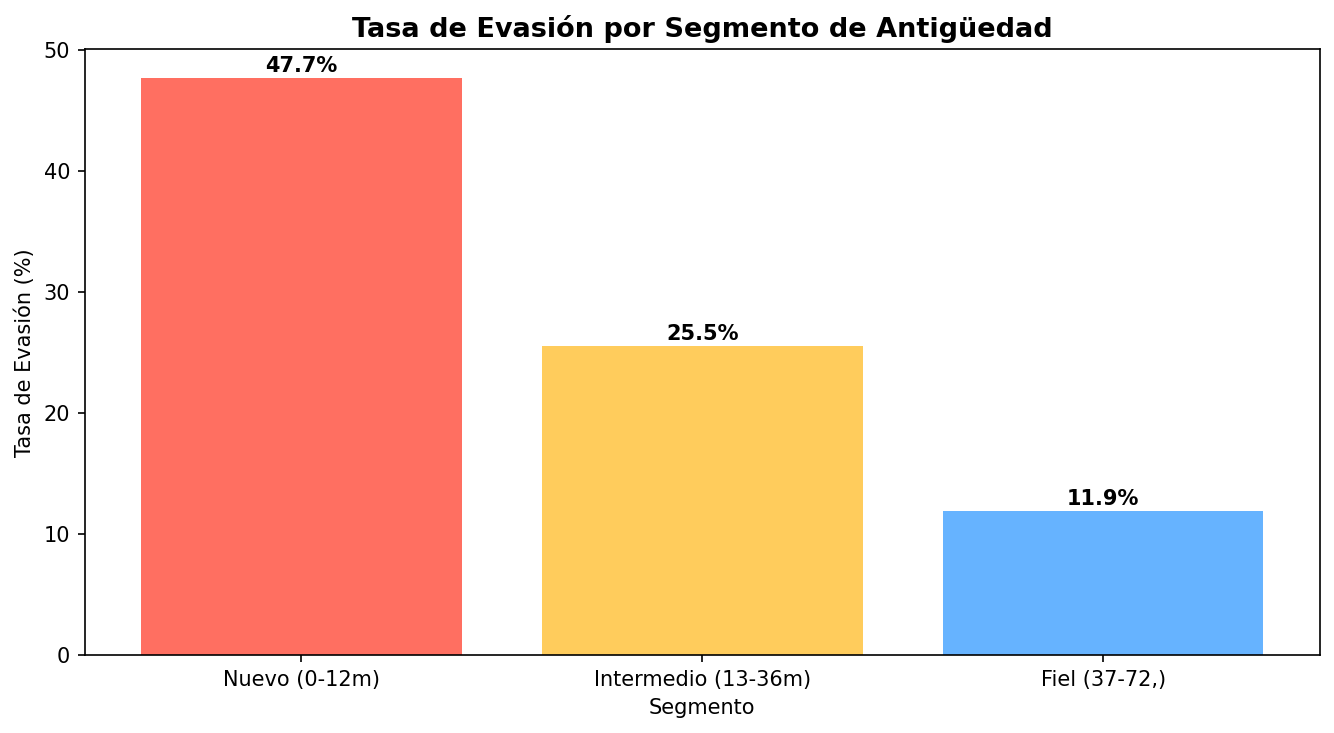

####**3.6 Evasión por Cargo Mensual**

##### Los clientes que evanden en promedio 74.44 mensuales, frente a 61.31 de los clientes permanecen. Esta diferencia de 13.13 mensuales sugiere que la sensibilidad al precio es un factor relevante en la decisión de abandono.

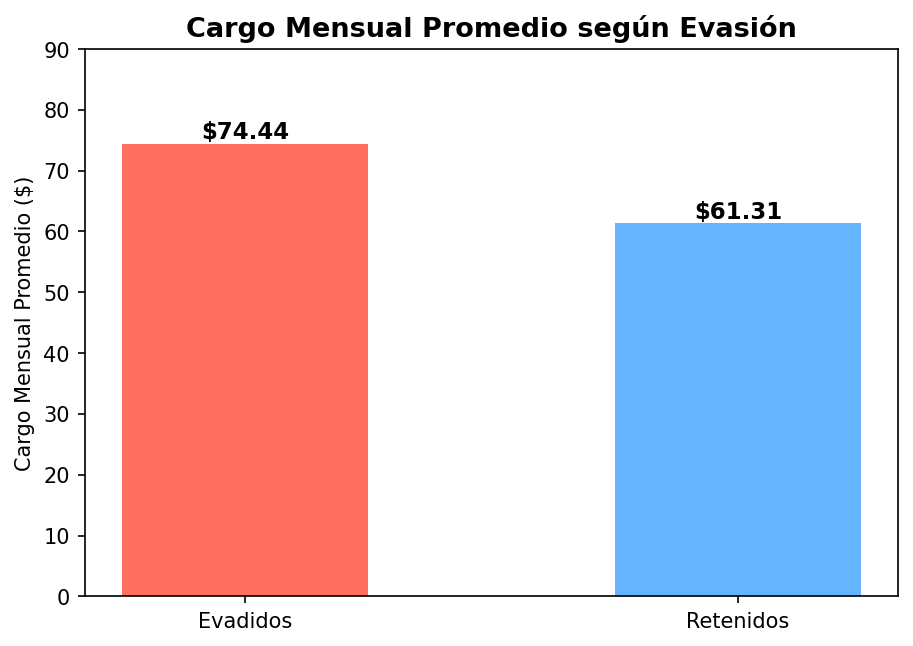

####**3.7 Evasión por perfil Demográfico**

#####     Los adultos mayores presentan una tasa de evasión del 41.7%, significativamente superior al 23.7% de los clientes no mayores. Este segmento puede requeriri atención diferenciada en términos de soporte y acompañamiento.

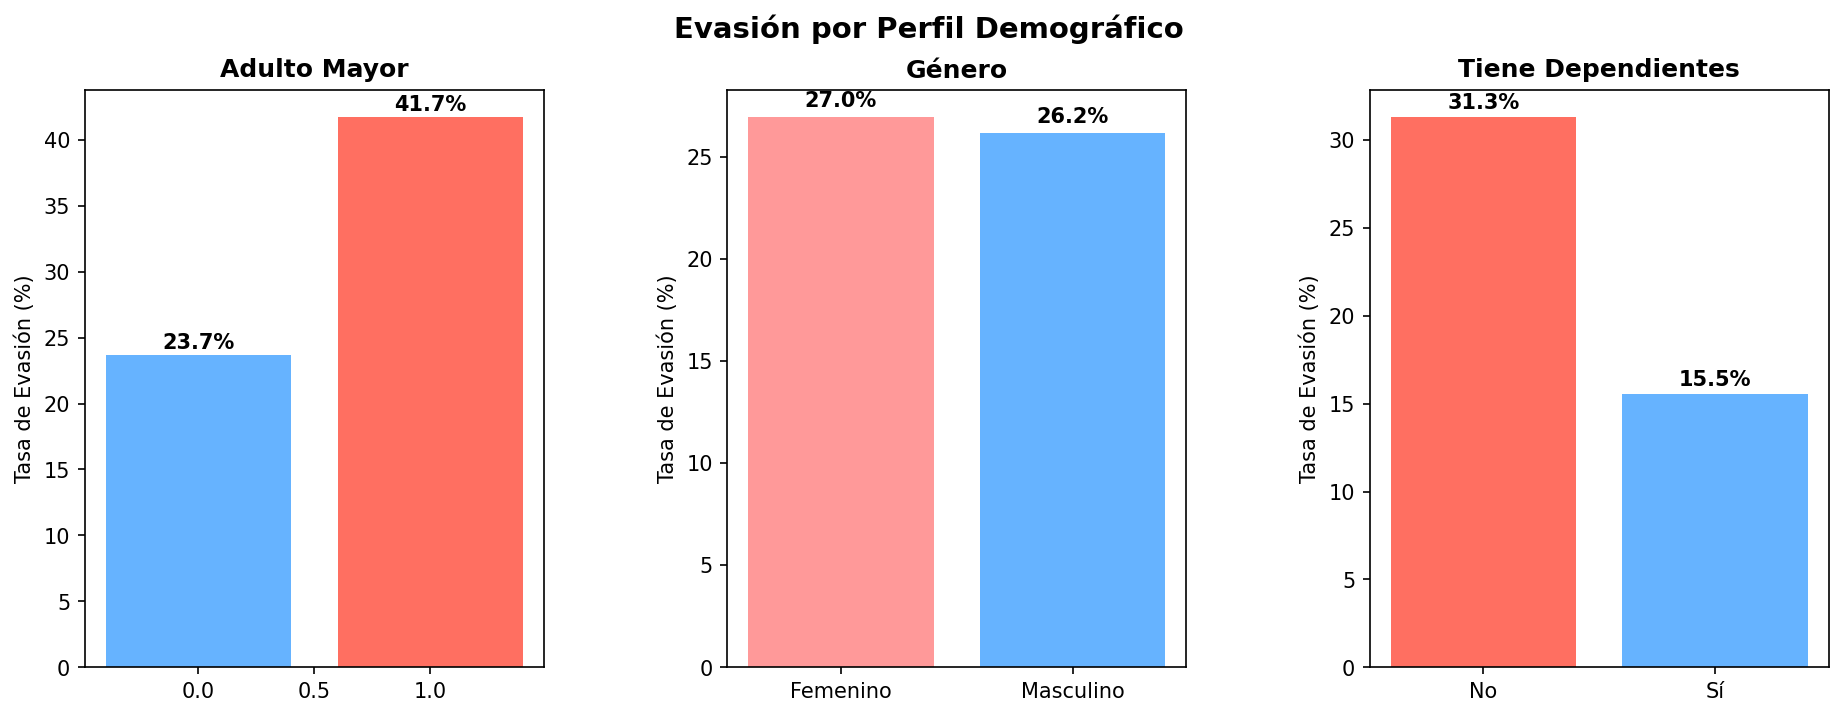


###**4. Conclusiones e insights**

#### El análisis exploratorio revela un perfil del cliente con mayor propensión a evadir. No se trada de una fenómeno aislado, sino de la clonfluencia de varios factores que, al combinarse, incrementan significativamente el riesgo de abandono.

####    El perfil de altor iesgo corresponde a un cliente con las siguientes características:

* Contrato mes a mes, que le permite cancerlar sin la penalización en cualquier momento.
* Servicio de fibra óptica, posiblemente insatisfecho con al relación costo-calidad.
* Método de pago por cheque electronónico, indicativo de menor compromiso automatizado.
* Antiguedad menor a 12 meses, en la etapa más crítica de la relación con la empresa.
* Cargo mensual superior al promedio, con mayor sensibilidad al precio.
* Sin servicios adicionales contratados, con menor vínculo con el ecosistema de productos.
* Adulto mayor, segmento con necesidades de soporte posiblemente no cubiertas.

####   El dato más relevante es que la evasión se concentra fuertemente en los primero 18 meses de vida del cliente. Esto convierte el proceso de onboarding y la experiencia temprana en el factor de retención más critico de toda la relación comercial.





###**5. Recomendaciones Estratégicsa**

####**5.1 Incentivar contratos de largo plazo**

####     Diseñar compañas de conversión de clientes mes a mes hacia contratos anuales o bianuales, ofreciendo descuentos, beneficios exclusivos o meses gratuitos. Dado que la tasa de evasión cae de 42.7% a 2.8% entre ambos tipos de contrato.

####**5.2 Programa de Onboarding para clientes nuevos**

####     Implementar un programa estructurado de acompañamiento durante los primeros 12 meses, el período más crítico. Esto puede incluir contacto proactivo, tutoriales de uso, revisiones de satisfacción períodicasy ofertas de fidelización tempranas.

####**5.3 Revisión de la propuesta de valor de la fibra óptica**

####     Investigar las causas de insatisfacción en el segmento de fibra óptica mediante encuestas y análsis de tickets de soporte. La tasa de 41.9% en este segmento sugiere que el precio, la calidad del servicio o el soporte técnico no están cumpliendo con las expectativas del cliente premium.

####**5.4 Migración a métodos de pago automáticos**

####     Incentivar a los clientes que pagan por cheque electrónico a migrar a débito automático o tarjeta de crédito, mediante bonificaciones o descuentos en la factura. Los pagos automáticos reducen la fricción delproceso y disminuyen la probabilidad de cancelación activa.

####**5.5 Estrategias de Servicios adicionales**

####     Ofrecer periodos de prueba gratuitos de servicios como seguridad online, soporte técnico y respaldo en la nube a clientes nuevos. Una vez que el cliente experimenta el valor de estos servicios, la probabilidad de abandono podria disminuir significativamente.

####**5.6 Atención diferenciada para adultos mayores**

####     Crear un programa de atención especialida para el segmento de adultos mayores, consoporte telefónico prioritario, asistencia técnica domiciliaria y comunicación simplificada. Este segmento presenta una tasa de evasión del 41.7% casi el doble que el resto de la base.
